Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `LAB_SECTION` below:

In [ ]:
NAME = "Aritro Sarkar Kabyo"
ID = "23201283"
SECTION = "29"

# Part 1: Solving a linear system using inverse matrix - 2 Marks

We have a linear system

\begin{align}
&a_{11} x_1 + a_{12} x_2 +  \cdots  + a_{1n} x_n = b_1\\
&a_{21} x_1 + a_{22} x_2 +  \cdots + a_{2n} x_n = b_2\\
&\cdots\\
&a_{n1} x_1 + a_{n2} x_2 +  \cdots + a_{nn} x_n = b_n\\
\end{align}

It is convenient to express this system in the
matrix form

\begin{align}
Ax = b
\end{align}

where $A$ is an $n \times n$ square matrix with elements $a_{ij}$, and $x$, $b$ are $n \times 1$ vectors.

We have to keep in mind that this system will have a unique solution iff $A$ is non-singular, given by $x = A^{-1}b.$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys

In [ ]:
def get_result_by_inverse_matrix(A, b):
  # A and b are numpy arrays

  # first check if the A is non-singular matrix. We know that the determinant of
  # a non-singular matrix will be non-zero
  if np.linalg.det(A) != 0:
    x = np.dot(np.linalg.inv(A), b)
    print(x)
    return x
  else:
    sys.exit("Singular matrix")
  # # HINT:
  # You may find functions such as linalg.det(), linalg.inv, etc. of the numpy package useful

In [ ]:
# Test case for the get_result_by_inverse_matrix(A, b) function.

data_A = np.array([[1, 2, 1], [1, -2, 2], [2, 12, -2]])
data_b = np.array([0,4,4])

test = get_result_by_inverse_matrix(data_A, data_b)
results = [11, -2.5, -6]

np.testing.assert_array_equal(test, results)

[11.  -2.5 -6. ]


# Part 2: Gaussian elimination - 2 Marks

Gaussian elimination uses elementary row operations to transform the system to upper triangular form $Ux = y$.

Elementary row operations include swapping rows and adding multiples of one rowto another.
They won’t change the solution $x$, but will change the matrix $A$ and the right-hand side $b$.

The upper triangular matrix, $𝑈$, is defined as

\begin{bmatrix}
u_{11} & u_{12} & \cdots & u_{1n}\\
0 & u_{22} & \cdots & u_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
0 & \cdots & 0 & u_{nn}\\
\end{bmatrix}


**Algorithm of Gaussian elimination**

Let $A^{(1)}=A$ and $b^{(1)}=b$. Then for each k from 1 to $n-1$, compute a new matrix $A^{(k+1)}$ and right-hand side $b^{(k+1)}$ by the following procedure:


1.   Define the row multipliers

\begin{align}
m_{ik} = \frac{a_{ik}^{(k)}}{a_{kk}^{(k)}}, i=k+1,\cdot \cdot \cdot,n.
\end{align}
2.   Use these to remove the unknown $x_k$ from equations $k + 1$ to $n$, leaving

\begin{align}
a_{ij}^{(k+1)}=a_{ij}^{(k)}-m_{ik}a_{kj}^{(k)}, b_{i}^{(k+1)}=b_{i}^{(k)}-m_{ik}b_{k}^{(k)}, i,j=k+1,\cdot \cdot \cdot, n.
\end{align}

It is helpful to combine these matrices to form an Augmented matrix (matrix $𝑏$ is the fourth column). We will perform this row operations on the Augmented matrix. It takes care of both $𝐴$ and $𝑏$ matrixes at the same time.

After generating the upper triangular matrix, we have to apply **backward substitution method**.
For any $n \times n$ upper triangular system, $Ux = b$, the solution is:

\begin{align}
x_j = \frac{b_j-\sum_{k=j+1}^{n}u_{jk}x_k}{u_{jj}}, j = n, n-1, \cdot\cdot\cdot, 1.
\end{align}

Here we assumed that $det𝑈≠0$.


In [ ]:
def get_result_gaussian_elimination(n, A):
  # n is the number of unknowns
  # A is the Augmented n x n+1 matrix. (numpy array)


  # Making numpy array of n size and initializing
  # to zero for storing solution vector
  x = np.zeros(n)
  A = A.astype(float)
  # 1. Apply Gauss Elimination
  #upper
  for i in range(n):
    if A[i][i] == 0:
      sys.exit("Zero division")

    for j in range(i+1,n):
      m = A[j][i]/A[i][i]
      for k in range(n+1):
        A[j][k] = A[j][k] - m * A[i][k]
  print(A, end = "\n\n")

  x[n-1] = A[n-1][n] / A[n-1][n-1]  # z
  for i in range(n-2,-1,-1):
    x[i] = A[i][n] # y=4
    for j in range(i+1,n):
      x[i] = x[i] - A[i][j] * x[j] # x = 4 - 1*z
    x[i] /= A[i][i] # x = (4 - 1*z) /

  return x

In [ ]:
# Test case for the get_result_gaussian_elimination(n, A) function.

data_n = 3
data_A = np.array([[1, 2, 1, 0], [1, -2, 2, 4], [2, 12, -2, 4]])

test = get_result_gaussian_elimination(data_n, data_A)
results = [11, -2.5, -6]

np.testing.assert_array_equal(test, results)

[[ 1.  2.  1.  0.]
 [ 0. -4.  1.  4.]
 [ 0.  0. -2. 12.]]



# Daily Evaluation - 4 Marks

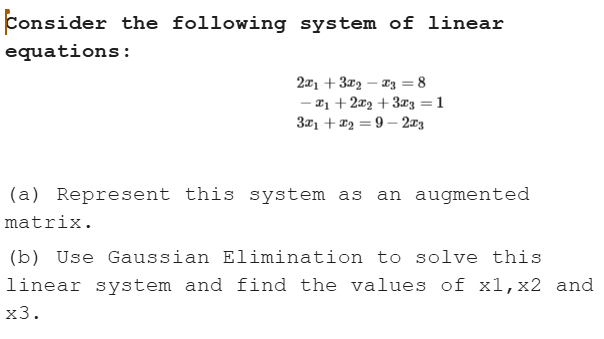

In [ ]:
data_augA = np.array([[2, 3, -1, 8], [-1, 2, 3, 1], [3, 1, 2, 9]])

n = 3
print(get_result_gaussian_elimination(n, data_augA))

[[ 2.   3.  -1.   8. ]
 [ 0.   3.5  2.5  5. ]
 [ 0.   0.   6.   2. ]]

[2.38095238 1.19047619 0.33333333]
